In [1]:
import numpy as np
import pandas as pd
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns
import os
import joblib

In [2]:
df = pd.read_csv('../data/raw/loan.csv')
df.head()

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4269 entries, 0 to 4268
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   loan_id                    4269 non-null   int64 
 1    no_of_dependents          4269 non-null   int64 
 2    education                 4269 non-null   object
 3    self_employed             4269 non-null   object
 4    income_annum              4269 non-null   int64 
 5    loan_amount               4269 non-null   int64 
 6    loan_term                 4269 non-null   int64 
 7    cibil_score               4269 non-null   int64 
 8    residential_assets_value  4269 non-null   int64 
 9    commercial_assets_value   4269 non-null   int64 
 10   luxury_assets_value       4269 non-null   int64 
 11   bank_asset_value          4269 non-null   int64 
 12   loan_status               4269 non-null   object
dtypes: int64(10), object(3)
memory usage: 433.7+ KB


In [4]:
df.duplicated().sum()

0

In [5]:
df.isnull().sum()

loan_id                      0
 no_of_dependents            0
 education                   0
 self_employed               0
 income_annum                0
 loan_amount                 0
 loan_term                   0
 cibil_score                 0
 residential_assets_value    0
 commercial_assets_value     0
 luxury_assets_value         0
 bank_asset_value            0
 loan_status                 0
dtype: int64

In [6]:
df.describe()

,loan_id,no_of_dependents,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value
count,4269.000000,4269.000000,4.269000e+03,4.269000e+03,4269.000000,4269.000000,4.269000e+03,4.269000e+03,4.269000e+03,4.269000e+03
mean,2135.000000,2.498712,5.059124e+06,1.513345e+07,10.900445,599.936051,7.472617e+06,4.973155e+06,1.512631e+07,4.976692e+06
std,1232.498479,1.695910,2.806840e+06,9.043363e+06,5.709187,172.430401,6.503637e+06,4.388966e+06,9.103754e+06,3.250185e+06
min,1.000000,0.000000,2.000000e+05,3.000000e+05,2.000000,300.000000,-1.000000e+05,0.000000e+00,3.000000e+05,0.000000e+00
25%,1068.000000,1.000000,2.700000e+06,7.700000e+06,6.000000,453.000000,2.200000e+06,1.300000e+06,7.500000e+06,2.300000e+06
50%,2135.000000,3.000000,5.100000e+06,1.450000e+07,10.000000,600.000000,5.600000e+06,3.700000e+06,1.460000e+07,4.600000e+06
75%,3202.000000,4.000000,7.500000e+06,2.150000e+07,16.000000,748.000000,1.130000e+07,7.600000e+06,2.170000e+07,7.100000e+06
max,4269.000000,5.000000,9.900000e+06,3.950000e+07,20.000000,900.000000,2.910000e+07,1.940000e+07,3.920000e+07,1.470000e+07


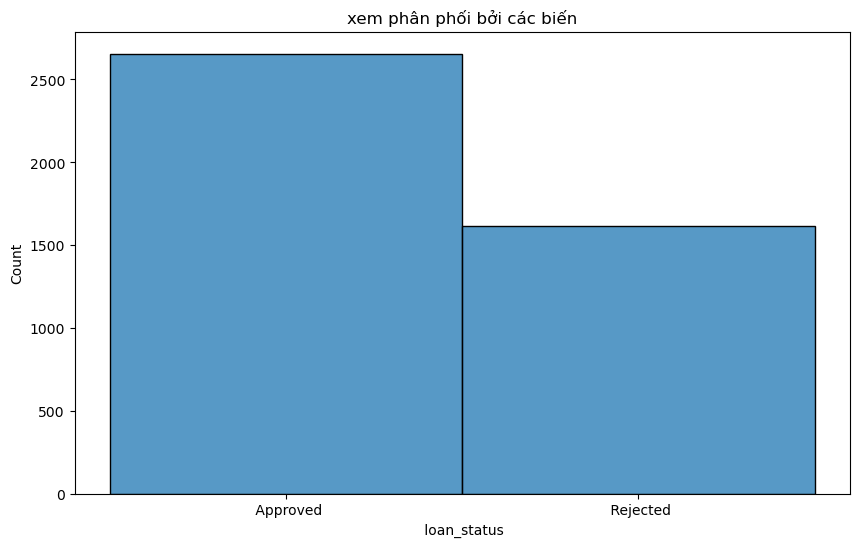

In [7]:
# vẽ biểu đồ histogram
plt.figure(figsize=(10, 6))
sns.histplot(df[ ' loan_status'], bins=30,)
plt.title("xem phân phối bởi các biến")
plt.show()

In [9]:
le = LabelEncoder()
df[' loan_status'] = le.fit_transform(df[' loan_status'])
df[' education'] = le.fit_transform(df[' education'])
df[' self_employed'] = le.fit_transform(df[' self_employed'])

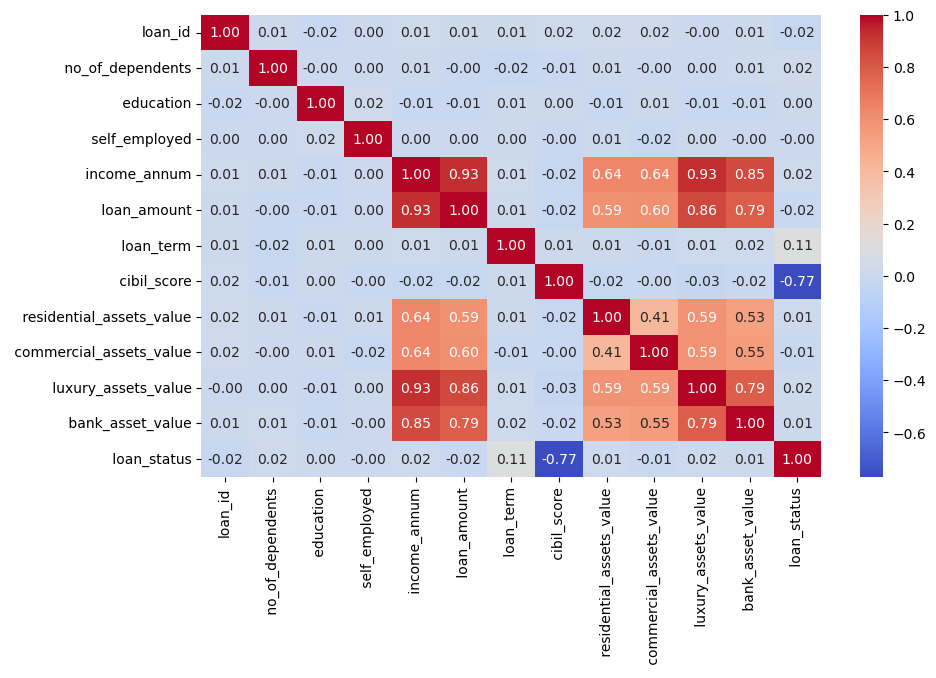

In [10]:
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.show()

In [11]:
print(df.columns)

Index(['loan_id', ' no_of_dependents', ' education', ' self_employed',
       ' income_annum', ' loan_amount', ' loan_term', ' cibil_score',
       ' residential_assets_value', ' commercial_assets_value',
       ' luxury_assets_value', ' bank_asset_value', ' loan_status'],
      dtype='object')


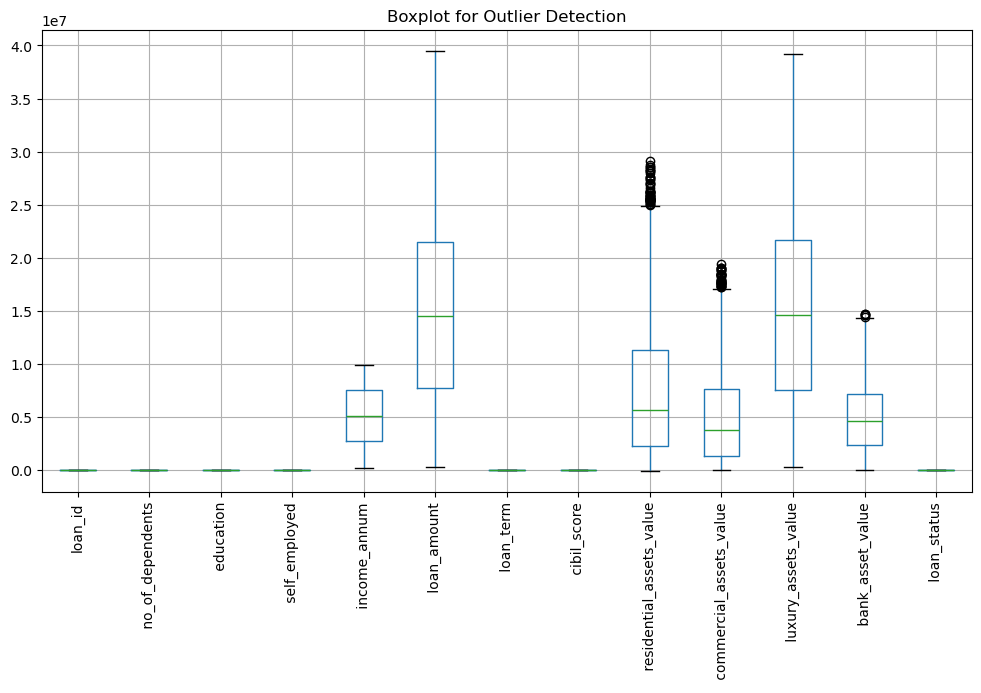

In [12]:
df.boxplot(figsize=(12,6), rot=90)
plt.title("Boxplot for Outlier Detection")
plt.show()


In [13]:
from scipy import stats
# Các cột cần kiểm tra
cols_to_check = [' bank_asset_value',' residential_assets_value',' commercial_assets_value']

for col in cols_to_check:
    df[col] = pd.to_numeric(df[col], errors='coerce')

# Tính toán z-score cho các cột đã chọn
z_scores = np.abs(stats.zscore(df[cols_to_check], nan_policy='omit'))
# Loại bỏ các hàng có z-score > 3
df_clean = df[(z_scores < 3).all(axis=1)]

# Reset lại index
df_ok = df_clean.reset_index(drop=True)

# Kiểm tra kết quả
print(df_ok.shape)

(4236, 13)


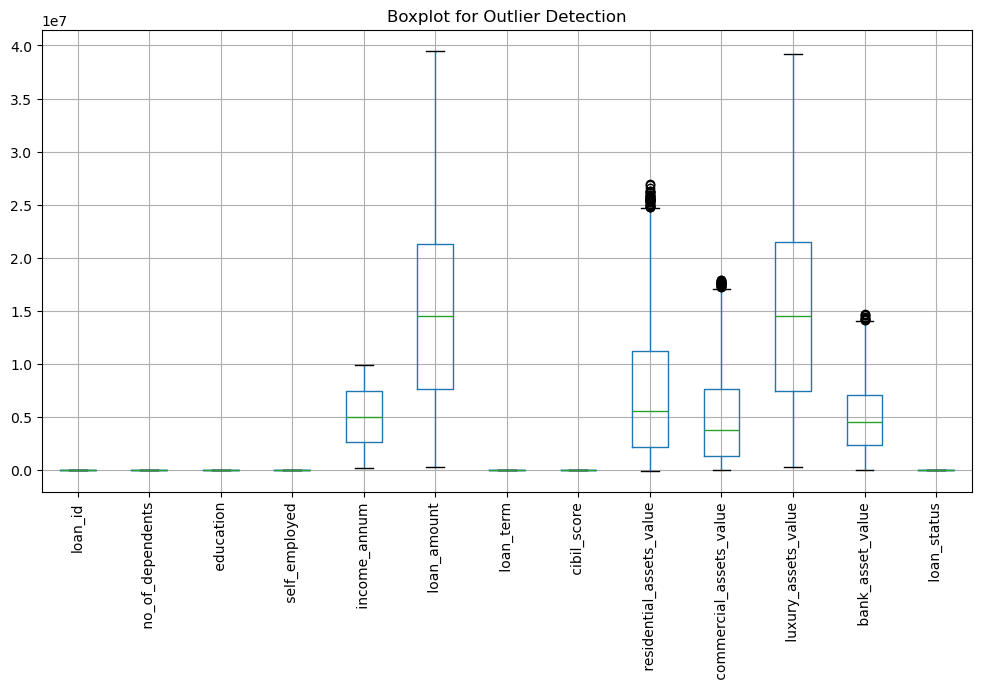

In [14]:
df_ok.boxplot(figsize=(12,6), rot=90)
plt.title("Boxplot for Outlier Detection")
plt.show()

In [15]:
# Kiểm tra thống kê mô tả
print(df_ok.describe())

# Kiểm tra số lượng outliers trong từng cột
Q1 = df_ok.quantile(0.25)
Q3 = df_ok.quantile(0.75)
IQR = Q3 - Q1
outliers = ((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).sum()
print(outliers)

           loan_id   no_of_dependents    education   self_employed  \
count  4236.000000        4236.000000  4236.000000     4236.000000   
mean   2135.764164           2.497403     0.496695        0.503541   
std    1232.689788           1.695258     0.500048        0.500046   
min       1.000000           0.000000     0.000000        0.000000   
25%    1069.750000           1.000000     0.000000        0.000000   
50%    2137.500000           3.000000     0.000000        1.000000   
75%    3203.250000           4.000000     1.000000        1.000000   
max    4269.000000           5.000000     1.000000        1.000000   

        income_annum   loan_amount    loan_term   cibil_score  \
count   4.236000e+03  4.236000e+03  4236.000000   4236.000000   
mean    5.023489e+06  1.502172e+07    10.892823    600.034466   
std     2.788383e+06  8.976516e+06     5.710434    172.316290   
min     2.000000e+05  3.000000e+05     2.000000    300.000000   
25%     2.600000e+06  7.600000e+06     6.000

In [16]:
# Loại bỏ outliers bằng IQR
Q1 = df_ok.quantile(0.25)
Q3 = df_ok.quantile(0.75)
IQR = Q3 - Q1

df_oke = df_ok[~((df_ok < (Q1 - 1.5 * IQR)) | (df_ok > (Q3 + 1.5 * IQR))).any(axis=1)]

In [17]:
df_oke.shape

(4168, 13)

In [18]:
# tách biến
X = df_oke[[ ' loan_amount',' bank_asset_value',' residential_assets_value',' commercial_assets_value',' cibil_score'
       ]]
y = df_oke[' loan_status']

In [19]:
#Chia dữ liệu thành tập huấn luyện và kiểm tra
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [54]:
# Tạo và huấn luyện mô hình XGBoost
model = xgb.XGBClassifier(
    n_estimators=200,   # Số lượng cây
    learning_rate=0.05,  # Tốc độ học
    max_depth=4,        # Độ sâu tối đa của cây
    subsample=0.8,# Tỷ lệ mẫu sử dụng cho mỗi cây
    reg_lambda=1.5,      
    colsample_bytree=0.8,  # Tỷ lệ đặc trưng sử dụng
    random_state=42
)


In [55]:
# Huấn luyện mô hình
model.fit(X_train, y_train)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.05, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=4, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=200, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

In [56]:
# Dự đoán trên tập kiểm tra
y_pred = model.predict(X_test)

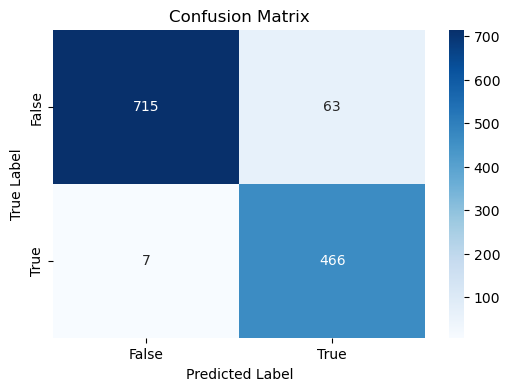

In [57]:
# Tạo ma trận nhầm lẫn
cm = confusion_matrix(y_test, y_pred)

# Vẽ heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['False', 'True'], yticklabels=['False', 'True'])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

In [58]:
# Đánh giá mô hình
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy của mô hình: {accuracy * 100:.2f}%")

Accuracy của mô hình: 94.40%


In [59]:
train_score = model.score(X_train, y_train)
test_score = model.score(X_test, y_test)
print(f"Train Accuracy: {train_score:.2f}")
print(f"Test Accuracy: {test_score:.2f}")

Train Accuracy: 0.96
Test Accuracy: 0.94


In [60]:
from sklearn.model_selection import learning_curve
# Tính toán Learning Curve
train_sizes, train_scores, test_scores = learning_curve(
    model, X_train, y_train, cv=5, scoring='accuracy', train_sizes=np.linspace(0.1, 1.0, 10))

In [61]:
# Tính trung bình và độ lệch chuẩn
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

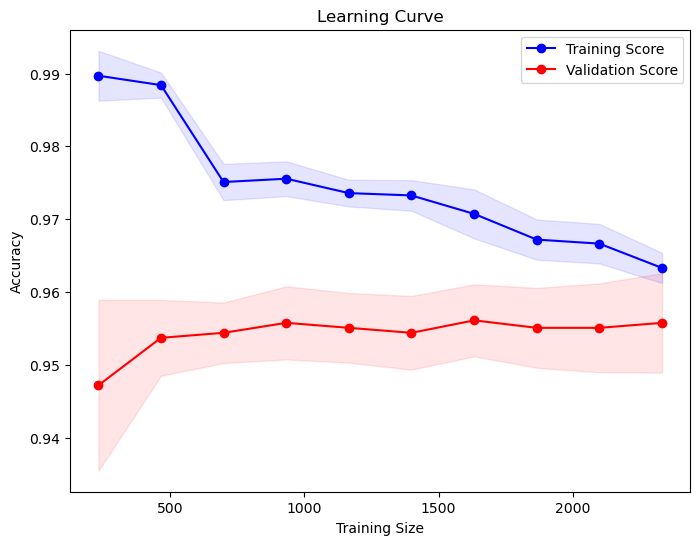

In [62]:
# Vẽ biểu đồ
plt.figure(figsize=(8, 6))
plt.plot(train_sizes, train_mean, 'o-', label="Training Score", color="blue")
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.1, color="blue")

plt.plot(train_sizes, test_mean, 'o-', label="Validation Score", color="red")
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.1, color="red")

plt.xlabel("Training Size")
plt.ylabel("Accuracy")
plt.legend()
plt.title("Learning Curve")
plt.show()

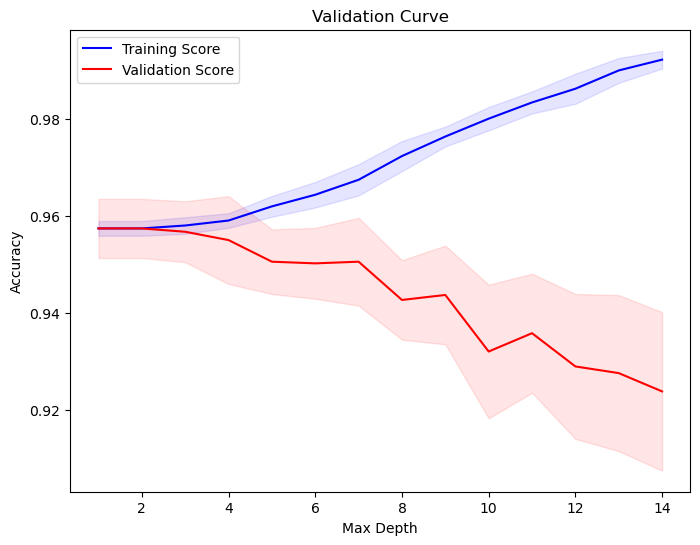

In [63]:
from sklearn.model_selection import validation_curve
from sklearn.tree import DecisionTreeClassifier

# Giá trị max_depth cần kiểm tra
param_range = np.arange(1, 15)

# Tính toán Validation Curve
train_scores, test_scores = validation_curve(
    DecisionTreeClassifier(), X_train, y_train, param_name="max_depth", param_range=param_range, cv=5, scoring="accuracy"
)

# Tính trung bình và độ lệch chuẩn
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# Vẽ biểu đồ
plt.figure(figsize=(8, 6))
plt.plot(param_range, train_mean, label="Training Score", color="blue")
plt.fill_between(param_range, train_mean - train_std, train_mean + train_std, alpha=0.1, color="blue")

plt.plot(param_range, test_mean, label="Validation Score", color="red")
plt.fill_between(param_range, test_mean - test_std, test_mean + test_std, alpha=0.1, color="red")

plt.xlabel("Max Depth")
plt.ylabel("Accuracy")
plt.legend()
plt.title("Validation Curve")
plt.show()

In [66]:
# Lưu mô hình 
joblib.dump(model, '../models/xgboot.model')

['../models/xgboot.model']